In [2]:
import hvplot.pandas
import ibis
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from ibis import _
from ibis import selectors as s
ibis.options.interactive = True

# create a DuckDB client
client = ibis.duckdb.connect()

## Workflow

- Data clean-up / transformations using ibis
- Convert to pandas
- Static visualizations with seaborn / interactive visualizations with holoviz

#### Read in 2 csv files containing data for red and white wines

In [3]:
red_wine = client.read_csv('data_sets/winequality-red.csv')
white_wine = client.read_csv('data_sets/winequality-white.csv')

#### Red wine:

In [4]:
red_wine.head()

┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓
┃ fixed acidity ┃ volatile acidity ┃ citric acid ┃ residual sugar ┃ chlorides ┃ free sulfur dioxide ┃ total sulfur dioxide ┃ density ┃ pH      ┃ sulphates ┃ alcohol ┃ quality ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩
│ float64       │ float64          │ float64     │ float64        │ float64   │ float64             │ float64              │ float64 │ float64 │ float64   │ float64 │ int64   │
├───────────────┼──────────────────┼─────────────┼────────────────┼───────────┼─────────────────────┼──────────────────────┼─────────┼─────────┼───────────┼─────────┼─────────┤
│           7.4 │             0.70 │        0.00 │            1.9 │     0.076 │                11.0 │                 34.0 │  0.9978 │    3.51 │      0.56 │     9.4 │       5 │
│           7.8 │             0.88 │        0.00 │            2.6 │     0.098 │                25.0 │                 67.0 │  0.9968 │    3.20 │      0.68 │     9.8 │       5 │
│           7.8 │             0.76 │        0.04 │            2.3 │     0.092 │                15.0 │                 54.0 │  0.9970 │    3.26 │      0.65 │     9.8 │       5 │
│          11.2 │             0.28 │        0.56 │            1.9 │     0.075 │                17.0 │                 60.0 │  0.9980 │    3.16 │      0.58 │     9.8 │       6 │
│           7.4 │             0.70 │        0.00 │            1.9 │     0.076 │                11.0 │                 34.0 │  0.9978 │    3.51 │      0.56 │     9.4 │       5 │
└───────────────┴──────────────────┴─────────────┴────────────────┴───────────┴─────────────────────┴──────────────────────┴─────────┴─────────┴───────────┴─────────┴─────────┘

#### White wine:

In [5]:
white_wine.head()

┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓
┃ fixed acidity ┃ volatile acidity ┃ citric acid ┃ residual sugar ┃ chlorides ┃ free sulfur dioxide ┃ total sulfur dioxide ┃ density ┃ pH      ┃ sulphates ┃ alcohol ┃ quality ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩
│ float64       │ float64          │ float64     │ float64        │ float64   │ float64             │ float64              │ float64 │ float64 │ float64   │ float64 │ int64   │
├───────────────┼──────────────────┼─────────────┼────────────────┼───────────┼─────────────────────┼──────────────────────┼─────────┼─────────┼───────────┼─────────┼─────────┤
│           7.0 │             0.27 │        0.36 │           20.7 │     0.045 │                45.0 │                170.0 │  1.0010 │    3.00 │      0.45 │     8.8 │       6 │
│           6.3 │             0.30 │        0.34 │            1.6 │     0.049 │                14.0 │                132.0 │  0.9940 │    3.30 │      0.49 │     9.5 │       6 │
│           8.1 │             0.28 │        0.40 │            6.9 │     0.050 │                30.0 │                 97.0 │  0.9951 │    3.26 │      0.44 │    10.1 │       6 │
│           7.2 │             0.23 │        0.32 │            8.5 │     0.058 │                47.0 │                186.0 │  0.9956 │    3.19 │      0.40 │     9.9 │       6 │
│           7.2 │             0.23 │        0.32 │            8.5 │     0.058 │                47.0 │                186.0 │  0.9956 │    3.19 │      0.40 │     9.9 │       6 │
└───────────────┴──────────────────┴─────────────┴────────────────┴───────────┴─────────────────────┴──────────────────────┴─────────┴─────────┴───────────┴─────────┴─────────┘

#### We want to combine the 2 data sets into 1 data set.  But we need to be able to distinguish our data by wine type.  So we'll need to create a `type` column which will indicate wine type (red vs white)

In [6]:
red_wine.mutate(type='red').head()

┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓
┃ fixed acidity ┃ volatile acidity ┃ citric acid ┃ residual sugar ┃ chlorides ┃ free sulfur dioxide ┃ total sulfur dioxide ┃ density ┃ pH      ┃ sulphates ┃ alcohol ┃ quality ┃ type   ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩
│ float64       │ float64          │ float64     │ float64        │ float64   │ float64             │ float64              │ float64 │ float64 │ float64   │ float64 │ int64   │ string │
├───────────────┼──────────────────┼─────────────┼────────────────┼───────────┼─────────────────────┼──────────────────────┼─────────┼─────────┼───────────┼─────────┼─────────┼────────┤
│           7.4 │             0.70 │        0.00 │            1.9 │     0.076 │                11.0 │                 34.0 │  0.9978 │    3.51 │      0.56 │     9.4 │       5 │ red    │
│           7.8 │             0.88 │        0.00 │            2.6 │     0.098 │                25.0 │                 67.0 │  0.9968 │    3.20 │      0.68 │     9.8 │       5 │ red    │
│           7.8 │             0.76 │        0.04 │            2.3 │     0.092 │                15.0 │                 54.0 │  0.9970 │    3.26 │      0.65 │     9.8 │       5 │ red    │
│          11.2 │             0.28 │        0.56 │            1.9 │     0.075 │                17.0 │                 60.0 │  0.9980 │    3.16 │      0.58 │     9.8 │       6 │ red    │
│           7.4 │             0.70 │        0.00 │            1.9 │     0.076 │                11.0 │                 34.0 │  0.9978 │    3.51 │      0.56 │     9.4 │       5 │ red    │
└───────────────┴──────────────────┴─────────────┴────────────────┴───────────┴─────────────────────┴──────────────────────┴─────────┴─────────┴───────────┴─────────┴─────────┴────────┘

In [7]:
white_wine.mutate(type='white').head()

┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓
┃ fixed acidity ┃ volatile acidity ┃ citric acid ┃ residual sugar ┃ chlorides ┃ free sulfur dioxide ┃ total sulfur dioxide ┃ density ┃ pH      ┃ sulphates ┃ alcohol ┃ quality ┃ type   ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩
│ float64       │ float64          │ float64     │ float64        │ float64   │ float64             │ float64              │ float64 │ float64 │ float64   │ float64 │ int64   │ string │
├───────────────┼──────────────────┼─────────────┼────────────────┼───────────┼─────────────────────┼──────────────────────┼─────────┼─────────┼───────────┼─────────┼─────────┼────────┤
│           7.0 │             0.27 │        0.36 │           20.7 │     0.045 │                45.0 │                170.0 │  1.0010 │    3.00 │      0.45 │     8.8 │       6 │ white  │
│           6.3 │             0.30 │        0.34 │            1.6 │     0.049 │                14.0 │                132.0 │  0.9940 │    3.30 │      0.49 │     9.5 │       6 │ white  │
│           8.1 │             0.28 │        0.40 │            6.9 │     0.050 │                30.0 │                 97.0 │  0.9951 │    3.26 │      0.44 │    10.1 │       6 │ white  │
│           7.2 │             0.23 │        0.32 │            8.5 │     0.058 │                47.0 │                186.0 │  0.9956 │    3.19 │      0.40 │     9.9 │       6 │ white  │
│           7.2 │             0.23 │        0.32 │            8.5 │     0.058 │                47.0 │                186.0 │  0.9956 │    3.19 │      0.40 │     9.9 │       6 │ white  │
└───────────────┴──────────────────┴─────────────┴────────────────┴───────────┴─────────────────────┴──────────────────────┴─────────┴─────────┴───────────┴─────────┴─────────┴────────┘

In [8]:
red_wine = red_wine.mutate(type='red')
white_wine = white_wine.mutate(type='white')

#### Now we will combine our 2 data sets into 1 using the `union()` function, but first let's confirm if the merged data set does indeed have data for the 2 wine types

In [9]:
red_wine.union(white_wine)['type'].value_counts()

┏━━━━━━━━┳━━━━━━━━━━━━┓
┃ type   ┃ type_count ┃
┡━━━━━━━━╇━━━━━━━━━━━━┩
│ string │ int64      │
├────────┼────────────┤
│ red    │       1599 │
│ white  │       4898 │
└────────┴────────────┘

In [10]:
wines = red_wine.union(white_wine)

In [11]:
wines

┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓
┃ fixed acidity ┃ volatile acidity ┃ citric acid ┃ residual sugar ┃ chlorides ┃ free sulfur dioxide ┃ total sulfur dioxide ┃ density ┃ pH      ┃ sulphates ┃ alcohol ┃ quality ┃ type   ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩
│ float64       │ float64          │ float64     │ float64        │ float64   │ float64             │ float64              │ float64 │ float64 │ float64   │ float64 │ int64   │ string │
├───────────────┼──────────────────┼─────────────┼────────────────┼───────────┼─────────────────────┼──────────────────────┼─────────┼─────────┼───────────┼─────────┼─────────┼────────┤
│           7.4 │             0.70 │        0.00 │            1.9 │     0.076 │                11.0 │                 34.0 │  0.9978 │    3.51 │      0.56 │     9.4 │       5 │ red    │
│           7.8 │             0.88 │        0.00 │            2.6 │     0.098 │                25.0 │                 67.0 │  0.9968 │    3.20 │      0.68 │     9.8 │       5 │ red    │
│           7.8 │             0.76 │        0.04 │            2.3 │     0.092 │                15.0 │                 54.0 │  0.9970 │    3.26 │      0.65 │     9.8 │       5 │ red    │
│          11.2 │             0.28 │        0.56 │            1.9 │     0.075 │                17.0 │                 60.0 │  0.9980 │    3.16 │      0.58 │     9.8 │       6 │ red    │
│           7.4 │             0.70 │        0.00 │            1.9 │     0.076 │                11.0 │                 34.0 │  0.9978 │    3.51 │      0.56 │     9.4 │       5 │ red    │
│           7.4 │             0.66 │        0.00 │            1.8 │     0.075 │                13.0 │                 40.0 │  0.9978 │    3.51 │      0.56 │     9.4 │       5 │ red    │
│           7.9 │             0.60 │        0.06 │            1.6 │     0.069 │                15.0 │                 59.0 │  0.9964 │    3.30 │      0.46 │     9.4 │       5 │ red    │
│           7.3 │             0.65 │        0.00 │            1.2 │     0.065 │                15.0 │                 21.0 │  0.9946 │    3.39 │      0.47 │    10.0 │       7 │ red    │
│           7.8 │             0.58 │        0.02 │            2.0 │     0.073 │                 9.0 │                 18.0 │  0.9968 │    3.36 │      0.57 │     9.5 │       7 │ red    │
│           7.5 │             0.50 │        0.36 │            6.1 │     0.071 │                17.0 │                102.0 │  0.9978 │    3.35 │      0.80 │    10.5 │       5 │ red    │
│             … │                … │           … │              … │         … │                   … │                    … │       … │       … │         … │       … │       … │ …      │
└───────────────┴──────────────────┴─────────────┴────────────────┴───────────┴─────────────────────┴──────────────────────┴─────────┴─────────┴───────────┴─────────┴─────────┴────────┘

#### Let's see how well red wine attributes correlate with each other

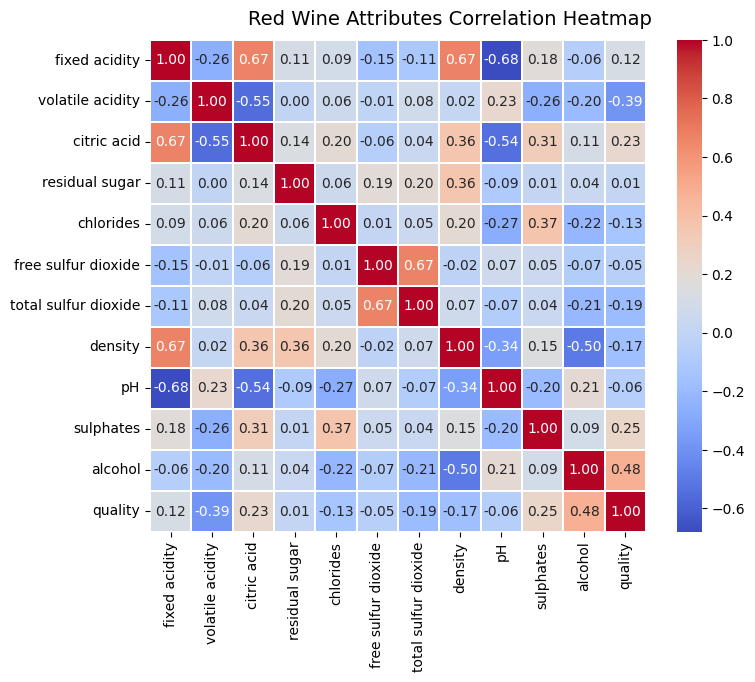

In [23]:
f, ax = plt.subplots(figsize=(8, 6))
corr = wines.filter(_['type']=='red').execute().corr(numeric_only=True)
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Red Wine Attributes Correlation Heatmap', fontsize=14)
plt.show()

#### From above, we see there is positive correleation between citric acid and fixed acidity

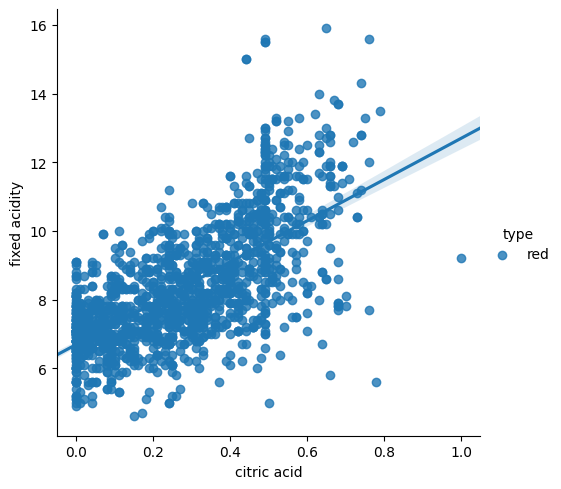

In [39]:
sns.lmplot(
    data= wines.filter(_['type']=='red').execute(),
    x='citric acid',
    y='fixed acidity',
    hue='type',
    height=5,
    truncate=False
)
plt.show()

#### From above, we see there is positive correleation between density and fixed acidity

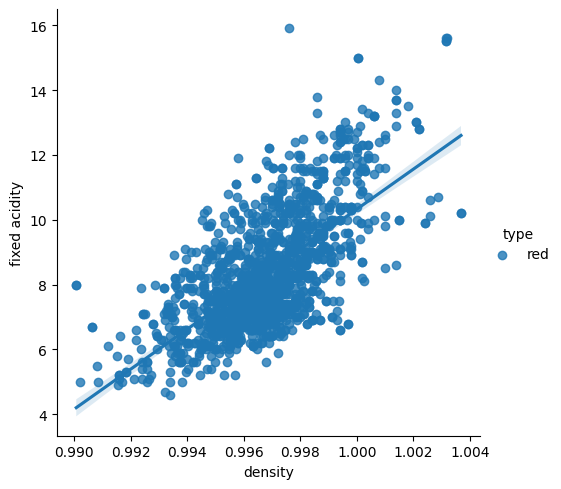

In [42]:
sns.lmplot(
    data= wines.filter(_['type']=='red').execute(),
    x='density',
    y='fixed acidity',
    hue='type',
    height=5
)
plt.show()

#### Negative correlation between pH and fixed acidity

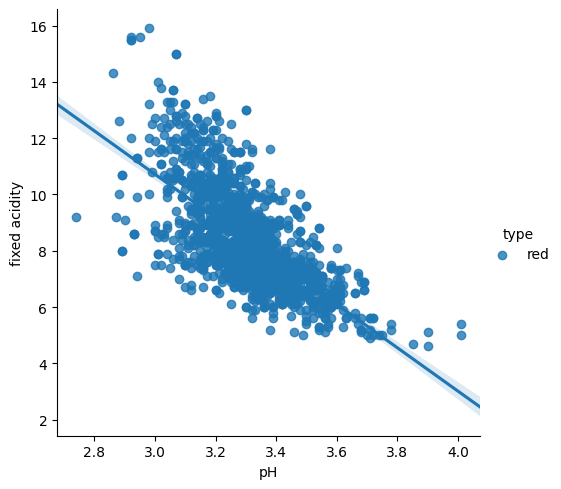

In [43]:
sns.lmplot(
    data= wines.filter(_['type']=='red').execute(),
    x='pH',
    y='fixed acidity',
    hue='type',
    height=5,
    truncate=False
)
plt.show()

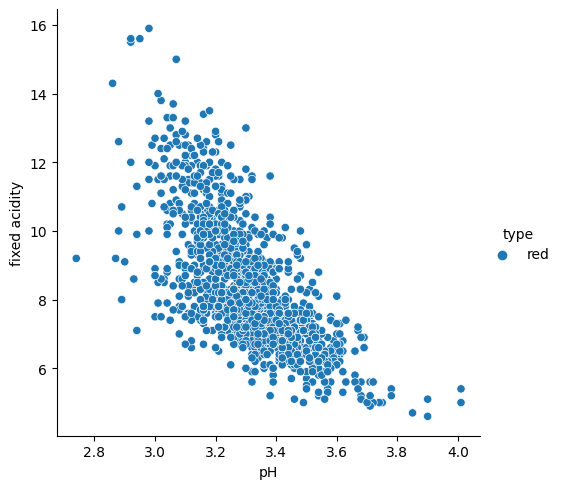

In [50]:
sns.relplot(
    data= wines.filter(_['type']=='red').execute(),
    x='pH',
    y='fixed acidity',
    hue='type',
    height=5,
)
plt.show()

#### Let's see how well white wine attributes correlate with each other

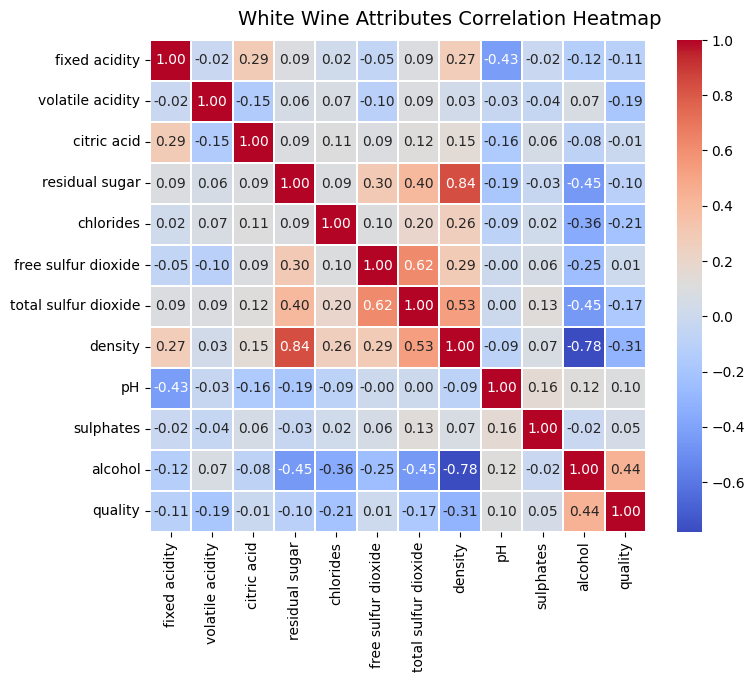

In [24]:
f, ax = plt.subplots(figsize=(8, 6))
corr = wines.filter(_['type']=='white').execute().corr(numeric_only=True)
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('White Wine Attributes Correlation Heatmap', fontsize=14)
plt.show()

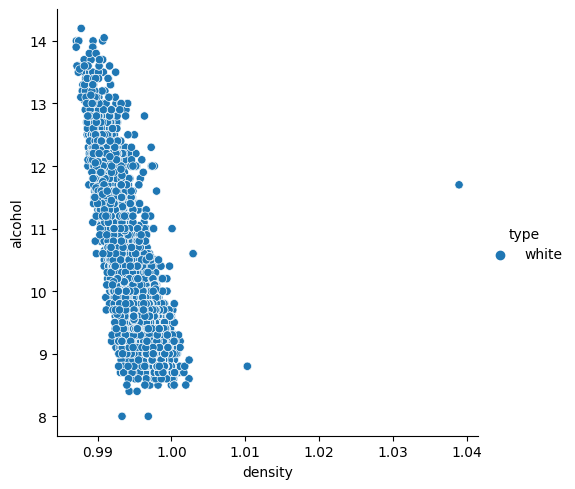

In [48]:
sns.relplot(
    data= wines.filter(_['type']=='white').execute(),
    x='density',
    y='alcohol',
    hue='type',
    height=5,
)
plt.show()

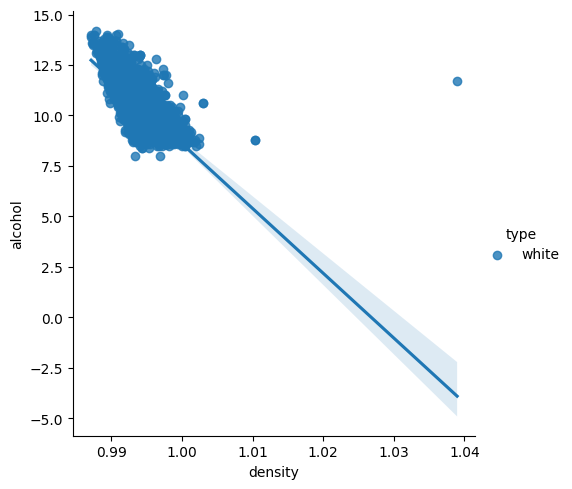

In [51]:
sns.lmplot(
    data= wines.filter(_['type']=='white').execute(),
    x='density',
    y='alcohol',
    hue='type',
    height=5,
)
plt.show()

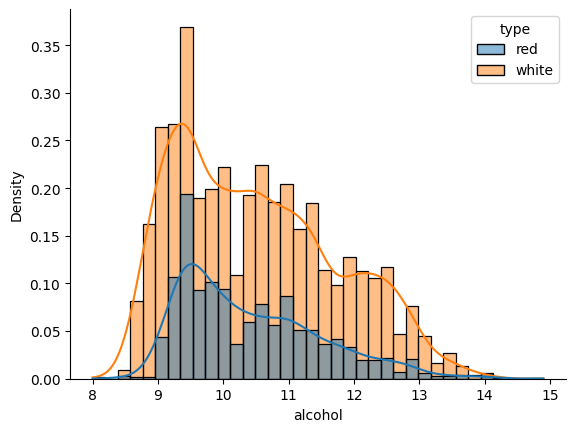

In [21]:
sns.histplot(
    data=wines.execute(),
    x='alcohol',
    hue='type',
    kde=True,
    stat='density'
)
sns.despine()

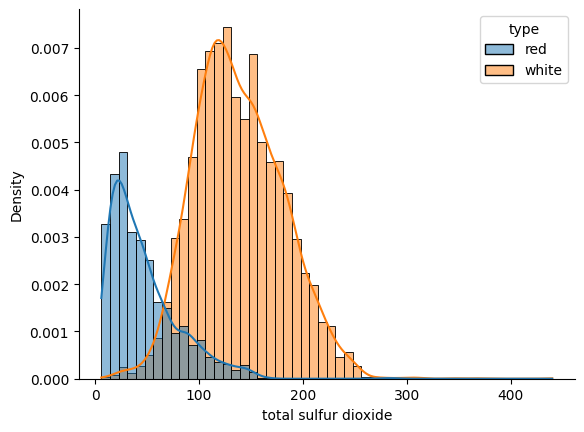

In [22]:
sns.histplot(
    data=wines.execute(),
    x='total sulfur dioxide',
    hue='type',
    kde=True,
    stat='density'
)
sns.despine()

In [25]:
wines.filter(_['type']=='red').execute().corr(numeric_only=True).hvplot.heatmap(
    height=800,
    width=900,
    rot=90,
    title='Red Wine Attributes Correlation Heatmap'
).opts(
    fontsize={'title': 20, 'xticks': 10, 'yticks': 10}
)

:HeatMap   [columns,index]   (value)

In [17]:
wines.filter(_['type']=='white').execute().corr(numeric_only=True).hvplot.heatmap(
    height=800,
    width=900,
    rot=90,
    title='White Wine Attributes Correlation Heatmap'
).opts(
    fontsize={'title': 20, 'xticks': 10, 'yticks': 10}
)

:HeatMap   [columns,index]   (value)

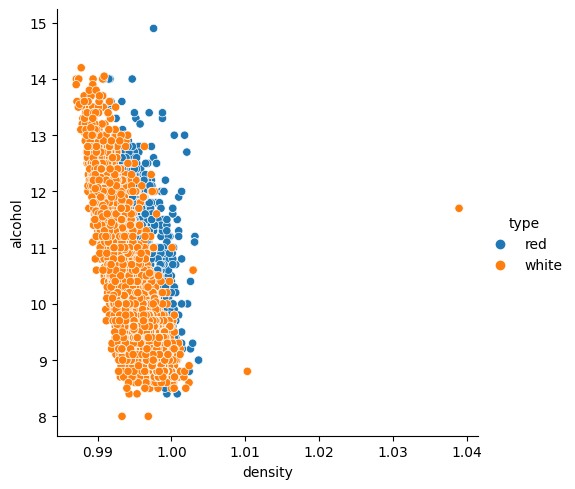

In [18]:
sns.relplot(
    data=wines.execute(),
    x='density',
    y='alcohol',
    hue='type',
    height=5
)
plt.show()

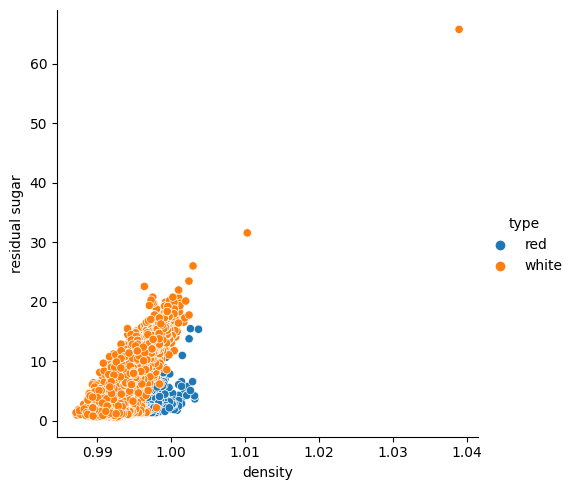

In [19]:
sns.relplot(
    data=wines.execute(),
    x='density',
    y='residual sugar',
    hue='type',
    height=5
)
plt.show()